# Задача 1

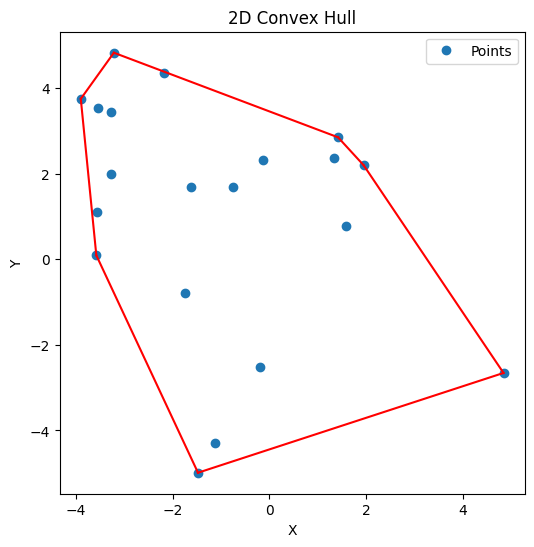

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

N = 20
points = np.random.uniform(-5, 5, (N, 2))
hull = ConvexHull(points)

plt.figure(figsize=(6, 6))
plt.plot(points[:, 0], points[:, 1], 'o', label='Points')

for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-')

plt.title('2D Convex Hull')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Задача 2

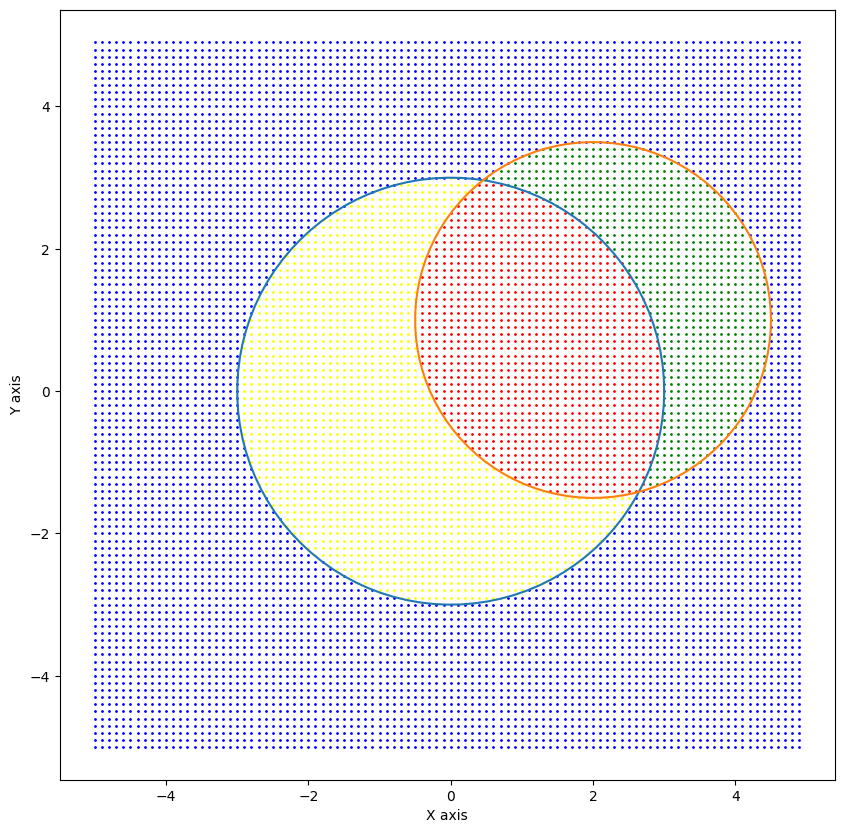

In [23]:
import numpy as np
import matplotlib.pyplot as plt

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __getitem__(self, index):
        if index == 0:
            return self.x
        elif index == 1:
            return self.y
        else:
            raise KeyError("There is 2-dimensional point")

class Vector:
    from typing import Self
    def __init__(self, p1: Point, p2: Point):
        self.ps = p1
        self.pe = p2
        self.x = p2.x - p1.x
        self.y = p2.y - p1.y
    

    def vector_product(self, other: Self):
        return self.x * other.y - self.y * other.x

class Figure:
    def __init__(self):
        pass

class Circle(Figure):
    from functools import singledispatchmethod
    from typing import List

    def __init__(self, center, radius, num_points=100):
        import numpy as np
        t = np.linspace(0, 2 * np.pi, num_points)
        self.x0, self.y0 = center
        self.radius = radius
        self.x = self.x0 + radius * np.cos(t)
        self.y = self.y0 + radius * np.sin(t)

    @singledispatchmethod
    def in_circle(self, obj):
        raise TypeError("Unsupported type")

    @in_circle.register
    def _(self, p: Point):
        from math import sqrt
        return sqrt((self.x0 - p.x)**2 + (self.y0 - p.y)**2) <= self.radius
    
    @in_circle.register(list)
    def _(self, lp):
        from math import sqrt
        return [sqrt((self.x0 - p.x)**2 + (self.y0 - p.y)**2) <= self.radius for p in lp]

def create_grid(xs, xe, ys, ye, step=0.1):
    from numpy import arange
    grid = []
    for x in arange(xs, xe, step):
        for y in arange(ys, ye, step):
            grid.append(Point(x, y))
    return grid


grid = create_grid(-5, 5, -5, 5)
circle1 = Circle((0, 0), 3)
circle2 = Circle((2, 1), 2.5)

unium = [p for p in grid if not circle1.in_circle(p) and not circle2.in_circle(p)]
cir1only = [p for p in grid if circle1.in_circle(p) and not circle2.in_circle(p)]
cir2only = [p for p in grid if not circle1.in_circle(p) and circle2.in_circle(p)]
cir1and2 = [p for p in grid if circle1.in_circle(p) and circle2.in_circle(p)]

plt.figure(figsize=(10, 10))
plt.plot(circle1.x, circle1.y)
plt.plot(circle2.x, circle2.y)

plt.scatter([p.x for p in unium], [p.y for p in unium], s=1, c="blue")
plt.scatter([p.x for p in cir1only], [p.y for p in cir1only], s=1, c="yellow")
plt.scatter([p.x for p in cir2only], [p.y for p in cir2only], s=1, c="green")
plt.scatter([p.x for p in cir1and2], [p.y for p in cir1and2], s=1, c="red")

plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.axis('equal')
plt.show()

# Задача 3

(np.float64(-0.15000000000000002),
 np.float64(3.15),
 np.float64(-0.2),
 np.float64(4.2))

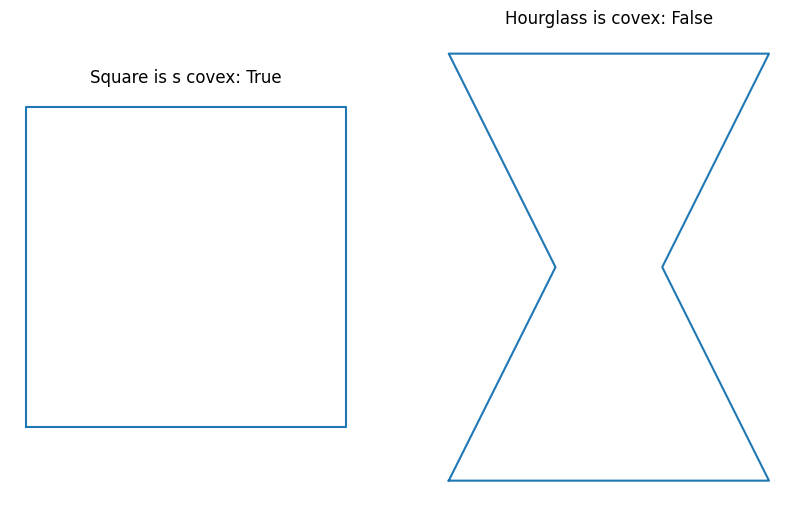

In [ ]:
class Polyhedron(Figure):
    def __init__(self, array):
        self.points = array

        def parr2varr(points_array):
            buffer = points_array[-1]
            vectors_array = []
            for point in points_array:
                vectors_array.append(Vector(buffer, point))
                buffer = point
            return vectors_array

        self.vectors = parr2varr(array)
        self.n = len(array)

        self.x = [p.x for p in array]
        self.y = [p.y for p in array]
        
    
    def is_covex(self):
        def pseudo_sign(x):
            return (x >= 0) - (x < 0)


        
        buffer = self.vectors[-1].vector_product(self.vectors[0])
        for i in range(0, self.n - 1):
            if pseudo_sign(self.vectors[i].vector_product(self.vectors[i + 1])) != pseudo_sign(buffer):
                return False
        
        return True

figure, axis = plt.subplots(1, 2, figsize=(10, 10))

axis[0].set_aspect('equal')
axis[1].set_aspect('equal')

# Square
p1 = Point(0, 0)
p2 = Point(1, 0)
p3 = Point(1, 1)
p4 = Point(0, 1)
square = Polyhedron([p1, p2, p3, p4])

axis[0].plot(square.x + [square.x[0]], square.y + [square.y[0]])
axis[0].set_title(f"Square is s covex: {square.is_covex()}")
axis[0].axis('off')

# Hourglass
p1 = Point(0, 0)
p2 = Point(3, 0)
p3 = Point(2, 2)
p4 = Point(3, 4)
p5 = Point(0, 4)
p6 = Point(1, 2)
hourglass = Polyhedron([p1, p2, p3, p4, p5, p6])

axis[1].plot(hourglass.x + [hourglass.x[0]], hourglass.y + [hourglass.y[0]])
axis[1].set_title(f"Hourglass is covex: {hourglass.is_covex()}")
axis[1].axis('off')